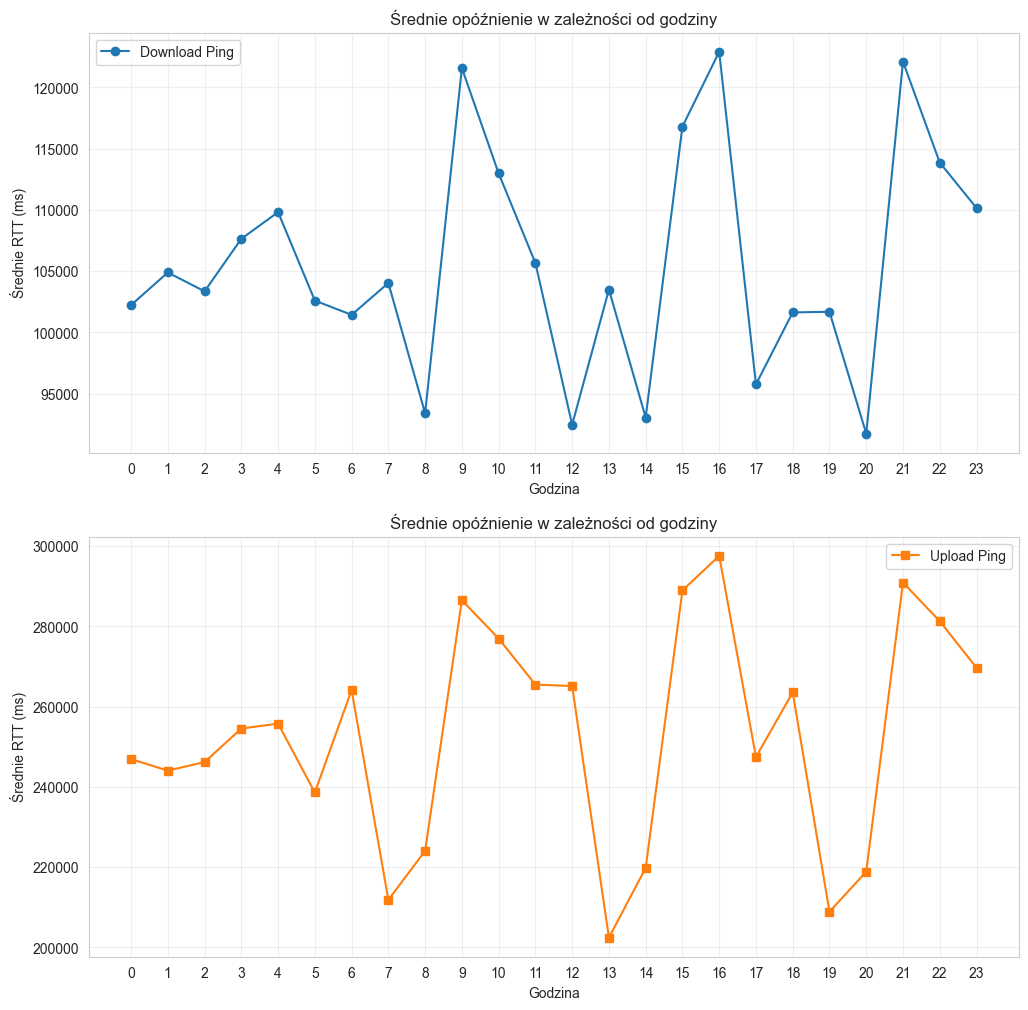

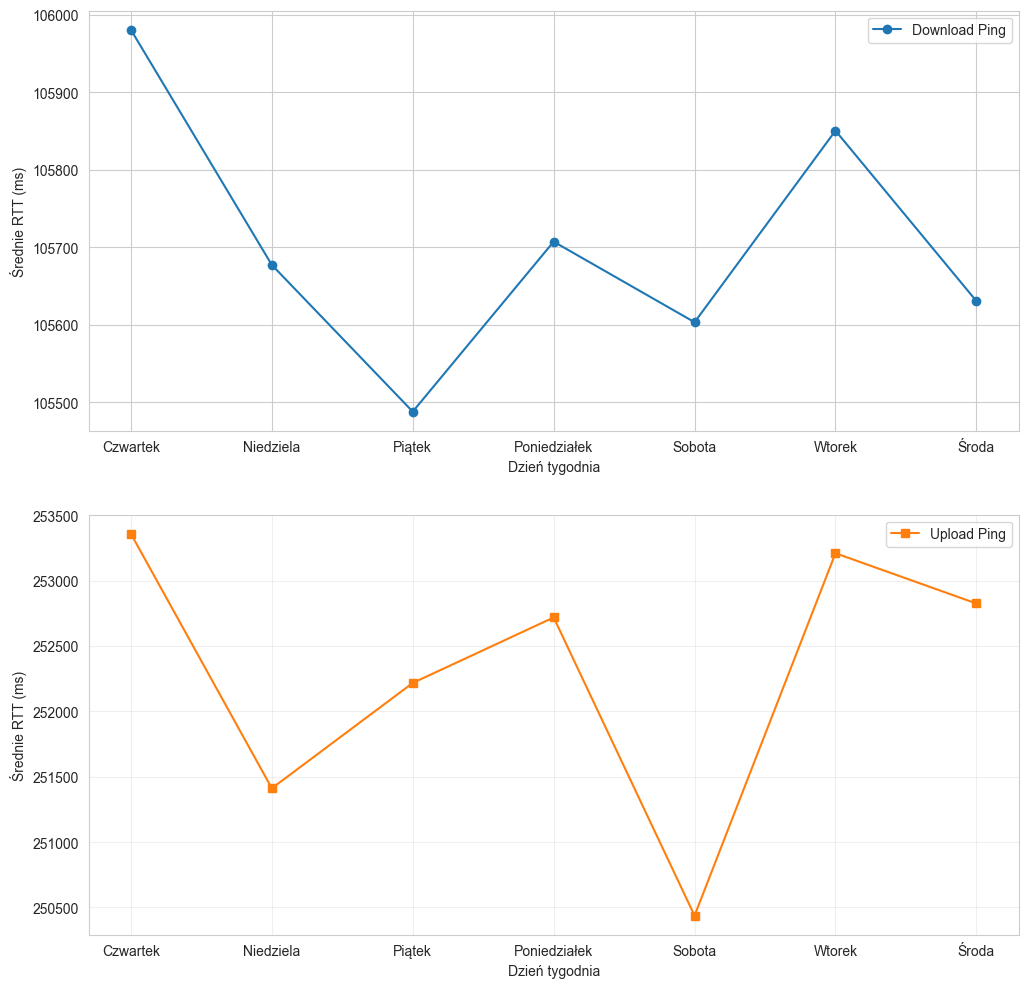

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Wczytaj dane
dlping = pd.read_csv("data/curr_dlping.csv", parse_dates=["dtime"])
ulping = pd.read_csv("data/curr_ulping.csv", parse_dates=["dtime"])

# Dodaj kolumny pomocnicze
dlping["hour"] = dlping["dtime"].dt.hour
dlping["day"] = dlping["dtime"].dt.day_name("pl_PL")
ulping["hour"] = ulping["dtime"].dt.hour
ulping["day"] = ulping["dtime"].dt.day_name("pl_PL")

# Stylowanie
sns.set_style("whitegrid")
plt.figure(figsize=(12, 12))

# ----------------------------------------------------------
# WYKRES 1: Średnie opóźnienie w godzinach (Download vs Upload)
# ----------------------------------------------------------
plt.subplot(2, 1, 1)
hourly_dl = dlping.groupby("hour")["rtt_avg"].mean().reset_index()
hourly_ul = ulping.groupby("hour")["rtt_avg"].mean().reset_index()

plt.plot(hourly_dl["hour"], hourly_dl["rtt_avg"], label="Download Ping", marker="o", color="#1f77b4")
plt.title("Średnie opóźnienie w zależności od godziny", fontsize=12)
plt.xlabel("Godzina")
plt.ylabel("Średnie RTT (ms)")
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(2, 1, 2)

plt.plot(hourly_ul["hour"], hourly_ul["rtt_avg"], label="Upload Ping", marker="s", color="#ff7f0e")
plt.title("Średnie opóźnienie w zależności od godziny", fontsize=12)
plt.xlabel("Godzina")
plt.ylabel("Średnie RTT (ms)")
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()


daily_dl = dlping.groupby("day")["rtt_avg"].mean().reset_index()
daily_ul = ulping.groupby("day")["rtt_avg"].mean().reset_index()

plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(daily_dl["day"], daily_dl["rtt_avg"], label="Download Ping", marker="o", color="#1f77b4")
plt.xlabel("Dzień tygodnia")
plt.ylabel("Średnie RTT (ms)")
plt.legend()

plt.subplot(2, 1,2)
plt.plot(daily_ul["day"], daily_ul["rtt_avg"], label="Upload Ping", marker="s", color="#ff7f0e")
plt.xlabel("Dzień tygodnia")
plt.ylabel("Średnie RTT (ms)")
plt.legend()



plt.grid(True, alpha=0.3)
plt.show()
